# Solving PDEs with Gridap

# Solve Poisson equation on a 2D square

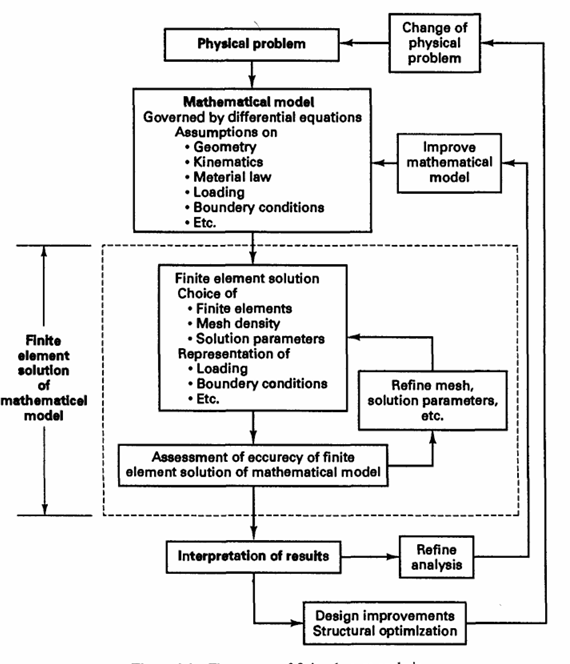

Basic steps for FEM:
1. Find the physical problem
2. Describe the mathematical model
    1. Governing equations (PDEs, boundary conditions, initial conditions)
    2. Constant parameters , source functions
    3. Define the unknown quantities to solve for
3. Create FE space to find the unknown quantities in.
    1. Create mesh
        1. Mesh density & mesh profile
        2. Type of FE spaces
        3. Conformity of the FE functions 
4. Writing the weak form of the problem.
5. Solving the problem.
6. Iterating for different mesh sizes until solution converges.

# Step 1: Define physical problem

Formally, the problem to solve is: find the scalar field \( u \) such that


\begin{cases} 
-\Delta u = f & \text{in } \Omega, \\
u = g & \text{on } \Gamma_D, \\
\nabla u \cdot \mathbf{n} = h & \text{on } \Gamma_N,
\end{cases}

In [1]:
f(x) = 1.0
g(x) = 2.0
h(x) = 3.0

h (generic function with 1 method)

In [36]:
using Gridap
# using Plots
using GridapMakie
using CairoMakie
using GLMakie

domain = (0.0, 1.0, 0.0, 1.0)  # Define a square domain
partition = (10,10)  # Mesh resolution
model = CartesianDiscreteModel(domain, partition)

CartesianDiscreteModel()

In [37]:
labels = get_face_labeling(model)

# 0-faces: vertices: points
# 1-faces: edges: lines
# 2-faces: faces: surfaces 
# 3-faces: cells: volumes 

Gridap.Geometry.FaceLabeling:
 0-faces: 121
 1-faces: 220
 2-faces: 100
 tags: 10
 entities: 9

Since we are considering the Poisson equation in 2D, we find that we have a total of 9 entities:

* We have 4 vertices.
* We have 4 edges
* We have 1 face

All these *entities* together make 9. Now the following step is to gives names to these entities, such that later when we solve the problem we can easily assign the boundary conditions. 

So from the above cel code we have the numbered labels of the model, and now we want to change these numbered labels to texted names. 

In [38]:
add_tag_from_tags!(labels, "Dirichlet", [5,7,8])
add_tag_from_tags!(labels, "Neumann", [6])

12-element Vector{String}:
 "tag_1"
 "tag_2"
 "tag_3"
 "tag_4"
 "tag_5"
 "tag_6"
 "tag_7"
 "tag_8"
 "interior"
 "boundary"
 "Dirichlet"
 "Neumann"

In [39]:
Ω = Triangulation(model)
Γ_D = Boundary(Ω,tags="Dirichlet")
Γ_N = Boundary(Ω,tags="Neumann")

CompositeTriangulation()

# Finite Element spaces

In [46]:
order = 1
reffe = ReferenceFE(lagrangian, Float64, order)
V0 = TestFESpace(Ω, reffe; conformity=:H1, dirichlet_tags="Dirichlet")
U0 = TrialFESpace(V0, g)

TrialFESpace()

In [49]:
degree = 2
dΩ = Measure(Ω,degree)
dΓ_D  = Measure(Γ_D,degree)
dΓ_N = Measure(Γ_N,degree)

GenericMeasure()

In [51]:
a(u,v) = ∫( ∇(v)⋅∇(u) )*dΩ
b(v) = ∫( v*f )*dΩ + ∫( v*h )*dΓ_N

b (generic function with 1 method)

In [52]:
op = AffineFEOperator(a,b,U0,V0)

AffineFEOperator()

In [53]:
ls = LUSolver()
solver = LinearFESolver(ls)

uh = solve(solver,op)

SingleFieldFEFunction():
 num_cells: 100
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 15381795345852993462

In [54]:
writevtk(Ω,"results",cellfields=["uh"=>uh])

(["results.vtu"],)